In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from scipy.stats import randint


In [2]:
# Load train and test datasets
train_data = pd.read_csv('DataUnderstanding.csv')
test_data = pd.read_csv('CleanedTest.csv')

In [3]:
#non important features, update, to observe if results will imporve 
drop_columns = ['name','artists','album_name','genre'
               ]

In [4]:
train_data.head()

,name,duration_min,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,4.029333,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.302000,0.536000,0.281,0.635,142.221,4.0,567.0,141.0,1.279305,j-dance
1,Ondskapens Galakse,5.558433,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.000089,0.800000,0.262,0.489,116.628,4.0,652.0,162.0,3.700483,black-metal
2,Can't Look Away,4.496667,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.066400,0.001270,0.117,0.385,140.880,4.0,619.0,155.0,1.279305,bluegrass
3,Thunderground,5.127517,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.000576,0.096900,0.299,0.637,143.956,4.0,733.0,183.0,4.067086,happy
4,Sick Bubblegum,3.737767,True,32,Rob Zombie,Hellbilly Deluxe 2 (Standard Explicit),0.642,0.972,5,-3.047,...,0.001520,0.000024,0.384,0.421,118.035,4.0,432.0,106.0,1.279305,industrial


In [5]:
#split train dataset into x-train and y-train
X_train, y_train = train_data.drop(drop_columns, axis=1), train_data['genre']

#split test dataset into x-test and y-test
X_test, y_test = test_data.drop(drop_columns, axis=1), test_data['genre']

In [6]:
# Define the desired number of samples for each class
#desired_samples = 709

# Oversample the 'sleep' class
#oversampler = RandomOverSampler(
#sampling_strategy={'j-idol': desired_samples, 'bluegrass': desired_samples, 'study': desired_samples,
#'indian': desired_samples,'forro': desired_samples, 'industrial': desired_samples, 'techno': desired_samples,
#'afrobeat': desired_samples,'chicago-house': desired_samples, 'breakbeat': desired_samples, 'spanish': desired_samples,
#'idm': desired_samples,'happy': desired_samples, 'black-metal': desired_samples, 'disney': desired_samples,
#'brazil': desired_samples,'iranian': desired_samples, 'j-dance': desired_samples, 'sleep': desired_samples,})
#X_over, y_over = oversampler.fit_resample(X_train, y_train)

# Undersample other classes
#undersampler = RandomUnderSampler(sampling_strategy={'mandopop': desired_samples
                                                      #})
#X_resampled, y_resampled = undersampler.fit_resample(X_over, y_over)

# Check the class distribution after resampling
#print(Counter(y_resampled))

In [7]:
# use only if you wish to split datasets for training and validation
# Split the training data into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
label_freq = train_data['genre'].value_counts()

# Print or display the frequency of each label
print(label_freq)

mandopop         709
j-idol           683
bluegrass        655
indian           637
study            607
forro            606
industrial       599
techno           597
afrobeat         586
chicago-house    583
breakbeat        574
spanish          571
idm              555
black-metal      553
happy            526
disney           503
brazil           470
iranian          388
j-dance          320
sleep            151
Name: genre, dtype: int64


In [9]:
#encode the genre column
#label_encoder = LabelEncoder()
#df1['genre_encoded'] = label_encoder.fit_transform(df1['genre'])
#df2['genre_encoded'] = label_encoder.fit_transform(df2['genre'])



# Separate features (X_train) and target variable (y_train)
#X_train = df1.drop(columns=drop_columns, axis=1)  # Adjust 'target_column' to the actual target column name
#y_train = df1['genre'].values


# Separate features (X_test) and target variable (y_test)
#X_test = df2.drop(columns=drop_columns, axis=1)  # Adjust 'target_column' to the actual target column name
#y_test = df2['genre'].values


#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)

#X_test = scaler.fit_transform(X_test)

In [10]:
X_train.shape

(10873, 18)

## Decision Tree

In [11]:
dt = DecisionTreeClassifier()

In [12]:
%%time
dt.fit(X_train, y_train)

# Access feature importances
feature_importances = dt.feature_importances_

CPU times: total: 391 ms
Wall time: 533 ms


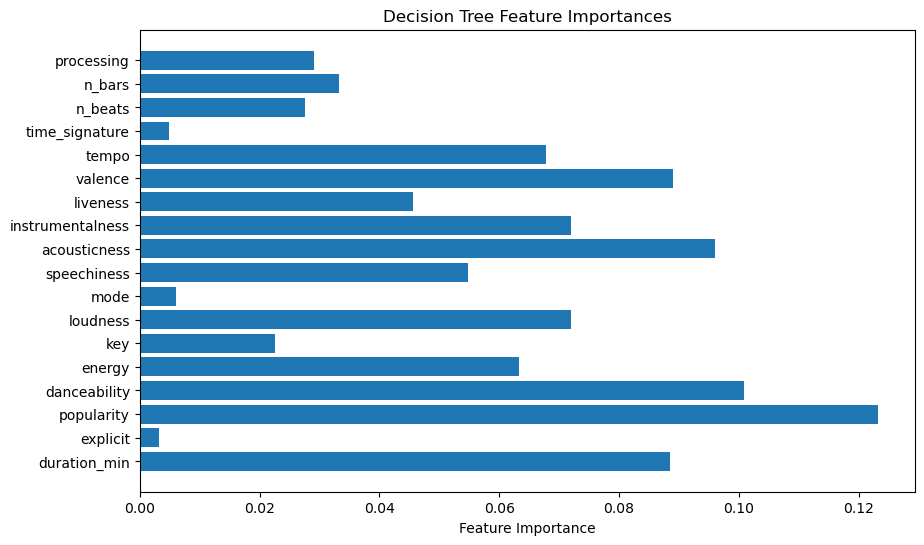

In [13]:
# Assuming X_train.columns contains the feature names
feature_names = X_train.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

In [14]:
dt.score(X_train, y_train)

1.0

In [15]:
y_train_pred = dt.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

1.0


In [16]:
y_train_pred, y_train

(array(['j-dance', 'black-metal', 'bluegrass', ..., 'techno', 'breakbeat',
        'indian'], dtype=object),
 0            j-dance
 1        black-metal
 2          bluegrass
 3              happy
 4         industrial
             ...     
 10868         j-idol
 10869            idm
 10870         techno
 10871      breakbeat
 10872         indian
 Name: genre, Length: 10873, dtype: object)

### Validation

###### Commented because it drop our accuracy, since our training set is moderately enough

In [17]:
# Validate on the validation set
#y_val_pred = dt.predict(X_val)
#validation_accuracy = accuracy_score(y_val, y_val_pred)
#print("Validation Accuracy:", validation_accuracy)


### Test Evaluation

In [18]:
y_test_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred, average="macro"))

0.39633129516397997
0.38189481455969043


In [19]:
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     afrobeat       0.29      0.24      0.27       205
  black-metal       0.60      0.64      0.62       192
    bluegrass       0.44      0.44      0.44       218
       brazil       0.19      0.19      0.19       158
    breakbeat       0.29      0.29      0.29       179
chicago-house       0.44      0.45      0.45       175
       disney       0.45      0.46      0.46       173
        forro       0.51      0.53      0.52       195
        happy       0.39      0.34      0.36       172
          idm       0.30      0.34      0.32       179
       indian       0.34      0.34      0.34       208
   industrial       0.29      0.28      0.29       197
      iranian       0.45      0.48      0.47       135
      j-dance       0.13      0.14      0.14       105
       j-idol       0.50      0.50      0.50       230
     mandopop       0.39      0.40      0.39       235
        sleep       0.28      0.21      0.24        57
      spa

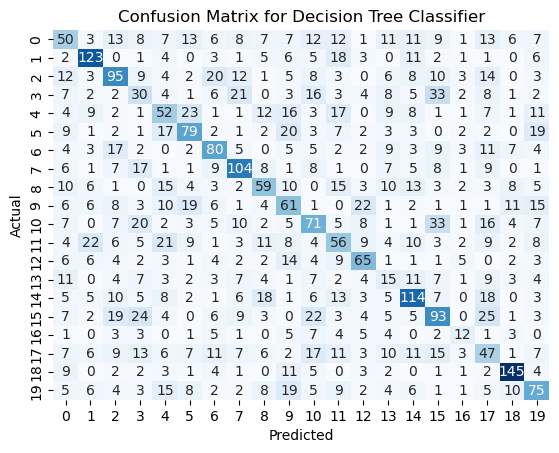

Accuracy: 0.39633129516397997


In [20]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy}')

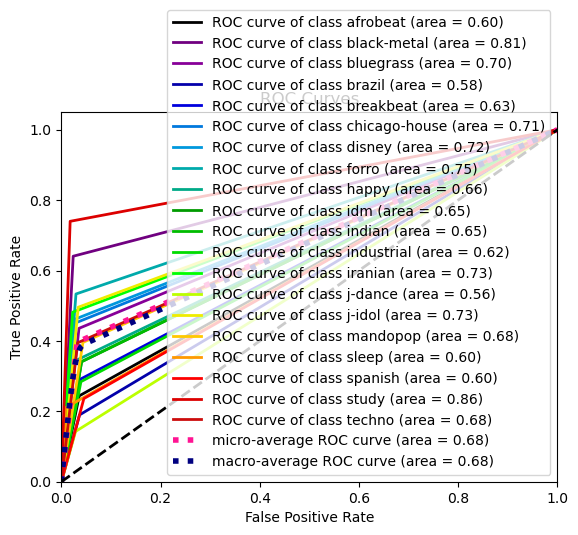

0.6754360896381055


In [21]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, dt.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, dt.predict_proba(X_test), multi_class="ovr", average="macro"))

###### uncomment and update the code below 

###### if interested in experimenting over and undersampling to solve unbalanced class issue

In [22]:
# Apply stratified sampling to create a balanced training set
#X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.9, stratify=y_train, random_state=42)

# Convert numpy arrays back to DataFrames
#X_train = pd.DataFrame(X_train, columns=train_data.columns[:-1])
#y_train = pd.Series(y_train, name='genre')

# Display the distribution of the target variable in the stratified sample
#print(y_train.value_counts())

In [23]:
#print("Stratified Class Distribution:")
#print(y_train_stratified.value_counts())


In [24]:
# Apply stratified sampling to create a balanced training set
#X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.6, stratify=y_train, random_state=42)

# Display the distribution of the target variable in the stratified sample
#print(y_train.value_counts())

In [25]:
#dt.score(X_train, y_train)

In [26]:
#y_train_pred = dt.predict(X_train)
#print(accuracy_score(y_train, y_train_pred))

In [27]:
#y_test_pred = dt.predict(X_test)
#print(accuracy_score(y_test, y_test_pred))
#print(f1_score(y_test, y_test_pred, average="macro"))

In [28]:
#print(classification_report(y_test, y_test_pred))

## Decision Tree - Cross Over Validation Grid Search

In [29]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.4192039024637791
Improved Accuracy: 0.44274596998332405


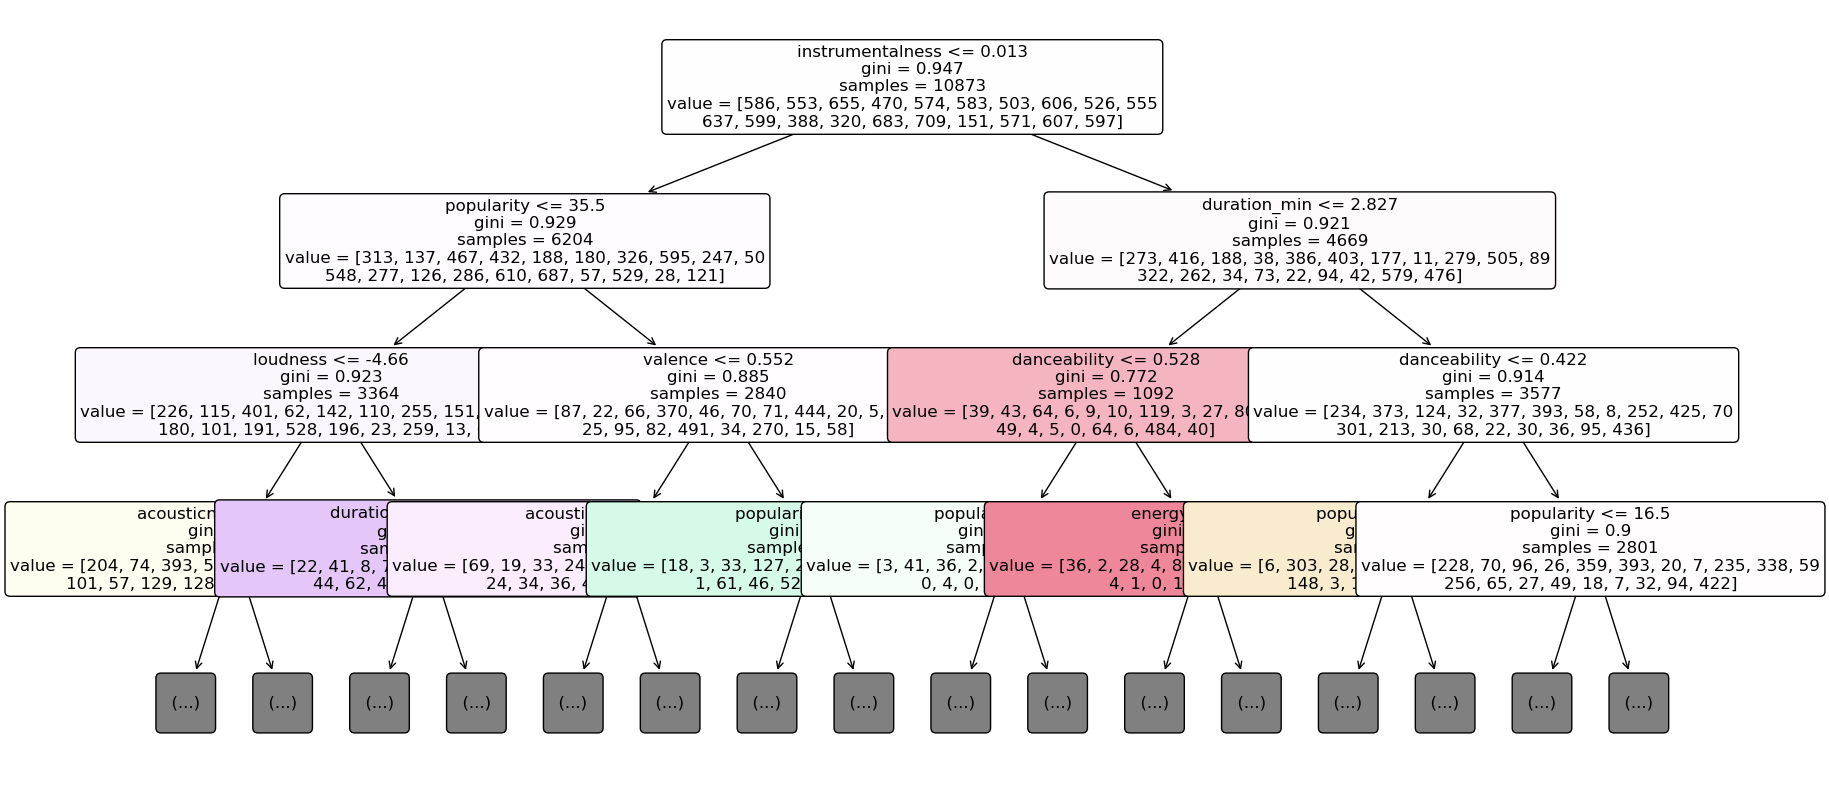

In [30]:
# Assuming X_train and y_train are your training data and labels
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier with the training data
clf.fit(X_train, y_train)

# Convert column names and class names to a list
feature_names = list(X_train.columns)
#class_names = list(feature_names.classes_)  # Assuming label_encoder was used for encoding target labels

# Set the size of the figure
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(clf, 
          filled=True, 
          rounded=True, 
          #class_names=class_names, 
          feature_names=feature_names, 
          max_depth=3, # Adjust or remove max_depth as needed
          fontsize=12)

# Show the plot
plt.show()


## Random Search Cross Validation

In [31]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),  # Random integer values between 2 and 10
    'min_samples_leaf': randint(1, 5)     # Random integer values between 1 and 4
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on the test set
best_clf_random = random_search.best_estimator_
y_pred_random = best_clf_random.predict(X_test)
print("Improved Accuracy (Random Search):", accuracy_score(y_test, y_pred_random))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}
Best Score: 0.4169046205374134
Improved Accuracy (Random Search): 0.4349638688160089


## KNN

### Standardize The test and train data

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

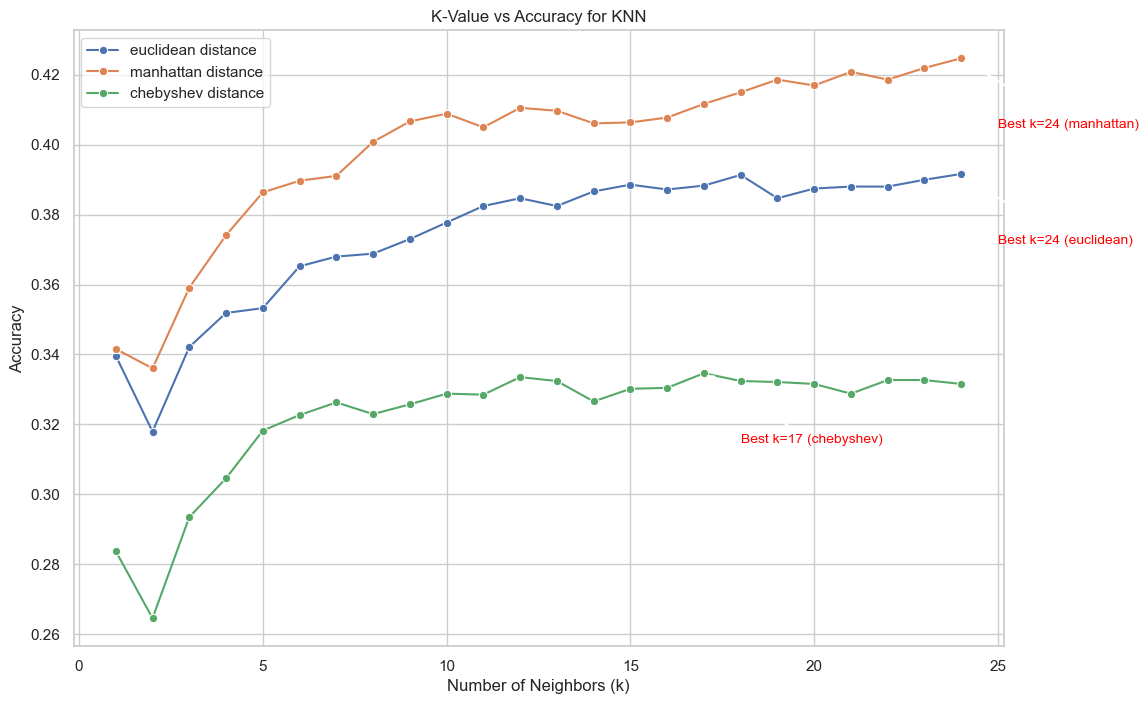

In [33]:
# Choose a range of k values
k_values = np.arange(1, 25)  # You can adjust the range based on your preferences

# Choose different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Create an empty list to store accuracy scores for each metric
all_results = []

# Iterate over different distance metrics
for metric in distance_metrics:
    # Create an empty list to store accuracy scores for each k
    accuracy_scores = []

    # Iterate over different k values
    for k in k_values:
        # Create and fit the KNN model with the specified distance metric
        knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = knn_model.predict(X_test)
        
        # Calculate accuracy and append to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Create a DataFrame to store k values and accuracy scores
    df_results = pd.DataFrame({'k': k_values, 'accuracy': accuracy_scores, 'metric': metric})
    
    # Find the k value with maximum accuracy for this metric
    best_k = df_results.loc[df_results['accuracy'].idxmax()]['k']
    
    # Store the results
    all_results.append((df_results, best_k, metric))

# Use Seaborn for an attractive plot with dotted lines and different colors for markers and lines
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot lines for each distance metric
for df_results, best_k, metric in all_results:
    # Plot dotted lines
    sns.lineplot(x='k', y='accuracy', data=df_results, label=f'{metric} distance', marker='o')
    
    # Mark the best k for each metric
    plt.annotate(f'Best k={best_k} ({metric})', xy=(best_k, df_results[df_results['k'] == best_k]['accuracy'].values[0]),
                 xytext=(best_k + 1, df_results['accuracy'].max() - 0.02),
                 arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5),
                 fontsize=10, color='red')

plt.title('K-Value vs Accuracy for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

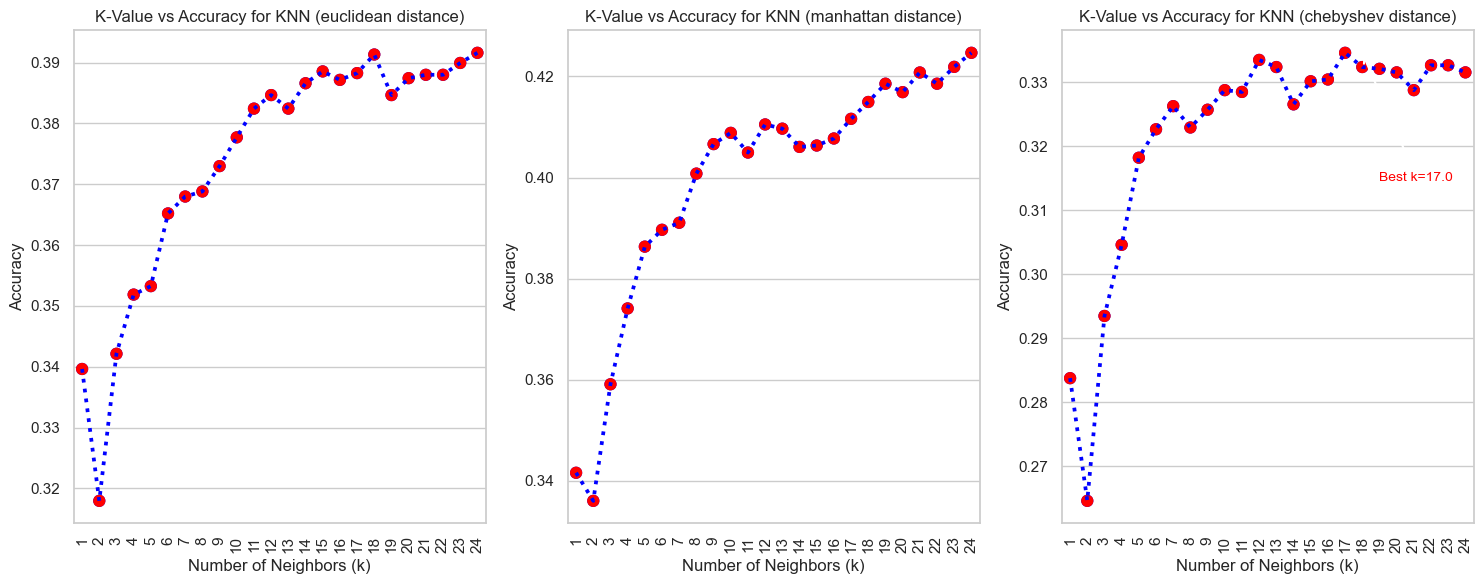

In [34]:
# Choose a range of k values
k_values = np.arange(1, 25)  # You can adjust the range based on your preferences

# Choose different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Create subplots for each distance metric
plt.figure(figsize=(15, 6))
for i, metric in enumerate(distance_metrics, start=1):
    # Create an empty list to store accuracy scores for each k
    accuracy_scores = []

    # Iterate over different k values
    for k in k_values:
        # Create and fit the KNN model with the specified distance metric
        knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = knn_model.predict(X_test)
        
        # Calculate accuracy and append to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Create a DataFrame to store k values and accuracy scores
    df_results = pd.DataFrame({'k': k_values, 'accuracy': accuracy_scores})

    # Find the k value with maximum accuracy
    best_k = df_results.loc[df_results['accuracy'].idxmax()]['k']

    # Create a subplot
    plt.subplot(1, len(distance_metrics), i)
    
    # Use Seaborn for an attractive plot with dotted lines and different colors for markers and lines
    sns.set(style="whitegrid")

    # Plot dotted lines
    sns.pointplot(x='k', y='accuracy', data=df_results, color='blue', markers='o', linestyles='dotted', capsize=0.2)

    # Plot markers with different colors
    sns.pointplot(x='k', y='accuracy', data=df_results, color='red', markers='o', linestyles='', capsize=0.2)

    plt.title(f'K-Value vs Accuracy for KNN ({metric} distance)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    plt.annotate(f'Best k={best_k}', xy=(best_k, df_results[df_results['k'] == best_k]['accuracy'].values[0]),
                 xytext=(best_k + 1, df_results['accuracy'].max() - 0.02),
                 arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5),
                 fontsize=10, color='red')

# Adjust layout
plt.tight_layout()
plt.show()

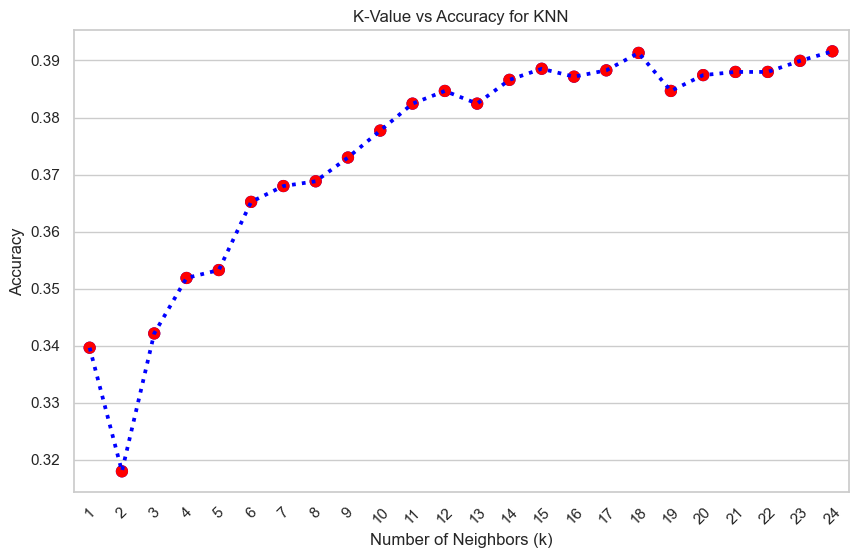

In [35]:
# Choose a range of k values
k_values = np.arange(1, 25)  # You can adjust the range based on your preferences

# Create an empty list to store accuracy scores for each k
accuracy_scores = []

# Iterate over different k values
for k in k_values:
    # Create and fit the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Create a DataFrame to store k values and accuracy scores
df_results = pd.DataFrame({'k': k_values, 'accuracy': accuracy_scores})

# Find the k value with maximum accuracy
best_k = df_results.loc[df_results['accuracy'].idxmax()]['k']

# Use Seaborn for an attractive plot with dotted lines and different colors for markers and lines
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot dotted lines
sns.pointplot(x='k', y='accuracy', data=df_results, color='blue', markers='o', linestyles='dotted', capsize=0.2)

# Plot markers with different colors
sns.pointplot(x='k', y='accuracy', data=df_results, color='red', markers='o', linestyles='', capsize=0.2)

plt.title('K-Value vs Accuracy for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.annotate(f'Best k={best_k}', xy=(best_k, df_results[df_results['k'] == best_k]['accuracy'].values[0]),
             xytext=(best_k + 1, df_results['accuracy'].max() - 0.02),
             arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5),
             fontsize=10, color='red')
plt.show()

In [36]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=17, metric='manhattan')  # You can adjust the number of neighbors (k)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.41161756531406335

Classification Report:
               precision    recall  f1-score   support

     afrobeat       0.35      0.27      0.31       205
  black-metal       0.59      0.59      0.59       192
    bluegrass       0.46      0.59      0.52       218
       brazil       0.21      0.14      0.17       158
    breakbeat       0.23      0.20      0.21       179
chicago-house       0.41      0.49      0.45       175
       disney       0.49      0.39      0.44       173
        forro       0.50      0.69      0.58       195
        happy       0.31      0.37      0.34       172
          idm       0.49      0.30      0.37       179
       indian       0.43      0.25      0.32       208
   industrial       0.30      0.27      0.28       197
      iranian       0.58      0.24      0.34       135
      j-dance       0.29      0.21      0.24       105
       j-idol       0.37      0.63      0.46       230
     mandopop       0.34      0.63      0.44       235
        sl

## KNN -- GRid Search 

In [37]:
# Assuming you have your data loaded in X_train, X_test, y_train, y_test

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 26)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize the KNN Classifier
knn_clf = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Score:", grid_search_knn.best_score_)

# Evaluate on the test set
best_knn_clf = grid_search_knn.best_estimator_
y_pred_knn = best_knn_clf.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred_knn))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\PC2\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan 0.33504981 0.32465768 0.32465768        nan 0.33504981
 0.30764259 0.32465768        nan 0.3570305  0.32428875 0.34139603
        nan 0.37367717 0.3404757  0.35601931        nan 0.38278255
 0.35013265 0.35850263        nan 0.38958831 0.35500721 0.36153764
        nan 0.39308323 0.35574289 0.36806754        nan 0.39823367
 0.35785839 0.37238992        nan 0.40255619 0.36098528 0.37183796
        nan 0.40531534 0.36677945 0.37551673        nan 0.40899396
 0.36843508 0.37754003        nan 0.41239684 0.37533305 0.38305831
        nan 0.41405252 0.37294111 0.3824145         nan 0.41221311
 0.37487275 0.38370206        nan 0.41331664 0.37735554 0.38452962
        nan 0.4140526  0.37606818 0.38305828        nan 0.41635191
 0.37717173 0.38443767        nan 0.41396037 0.37606815 0.38305808
        nan 0.41488041 0.37726391 0.38563333        nan

Best Parameters: {'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
Best Score: 0.41635190682804296
Improved Accuracy: 0.4232907170650361


### Random Search

In [38]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_neighbors': list(range(1, 26)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize the KNN Classifier
knn_clf = KNeighborsClassifier()

# Initialize RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=knn_clf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search_knn.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", random_search_knn.best_params_)
print("Best Score:", random_search_knn.best_score_)

# Evaluate on the test set
best_knn_clf_random = random_search_knn.best_estimator_
y_pred_knn_random = best_knn_clf_random.predict(X_test)
print("Improved Accuracy (Random Search):", accuracy_score(y_test, y_pred_knn_random))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\PC2\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.38370199 0.41221311 0.37606815 0.41239684        nan 0.37551673
 0.35500721        nan 0.32428875        nan 0.35013265 0.35785839
 0.41488041 0.40255619 0.37689597        nan        nan 0.41506425
        nan 0.37238992 0.38370206        nan 0.35574289 0.36843508
 0.41396037 0.35601931        nan        nan 0.3570305         nan
 0.34139603 0.38305831 0.41386889        nan 0.41432882 0.33504981
 0.37717173 0.41635191 0.37183796        nan 0.41405252 0.36098528
 0.32465768 0.38388564 0.36806754 0.35850263 0.41488059 0.39308323
 0.37606818 0.37367717]
  warnings.warn(


Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 17}
Best Score: 0.41635190682804296
Improved Accuracy (Random Search): 0.4232907170650361


### Naive Bayes

### Gaussian

In [39]:
clf = GaussianNB()

In [40]:
%%time
clf.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 41.5 ms


GaussianNB()

In [41]:
label_freq = y_train.value_counts()

# Print or display the frequency of each label
print(label_freq)

mandopop         709
j-idol           683
bluegrass        655
indian           637
study            607
forro            606
industrial       599
techno           597
afrobeat         586
chicago-house    583
breakbeat        574
spanish          571
idm              555
black-metal      553
happy            526
disney           503
brazil           470
iranian          388
j-dance          320
sleep            151
Name: genre, dtype: int64


In [42]:
y_pred = clf.predict(X_test)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.26181211784324626


In [44]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     afrobeat       0.42      0.02      0.05       205
  black-metal       0.66      0.54      0.59       192
    bluegrass       1.00      0.01      0.02       218
       brazil       0.35      0.04      0.07       158
    breakbeat       0.24      0.17      0.20       179
chicago-house       0.50      0.57      0.53       175
       disney       0.11      0.95      0.19       173
        forro       0.30      0.59      0.40       195
        happy       0.38      0.20      0.26       172
          idm       0.47      0.11      0.18       179
       indian       0.00      0.00      0.00       208
   industrial       0.42      0.17      0.24       197
      iranian       0.53      0.07      0.12       135
      j-dance       0.22      0.19      0.20       105
       j-idol       0.34      0.67      0.45       230
     mandopop       0.35      0.46      0.40       235
        sleep       0.00      0.00      0.00        57
      spa

C:\Users\PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
clf.predict_proba(X_test)

array([[6.68520053e-04, 3.49113978e-04, 3.71006107e-07, ...,
        1.62418266e-02, 9.97162046e-10, 6.03994907e-05],
       [6.26938874e-03, 1.81091935e-02, 2.43092087e-05, ...,
        2.39398561e-14, 1.53777462e-23, 8.34056237e-01],
       [8.67106664e-05, 1.31618198e-06, 2.11884629e-04, ...,
        5.29874163e-04, 2.79697382e-05, 1.32126836e-05],
       ...,
       [1.57095784e-03, 8.53797727e-07, 1.10202671e-04, ...,
        2.30531645e-03, 8.73305218e-15, 2.86150217e-04],
       [4.19399411e-05, 9.60525073e-01, 7.95561138e-12, ...,
        3.48532235e-06, 8.79028199e-26, 7.49256659e-06],
       [1.99840430e-05, 1.80147831e-02, 1.89150997e-14, ...,
        1.51179079e-08, 8.18893242e-19, 3.85810505e-05]])

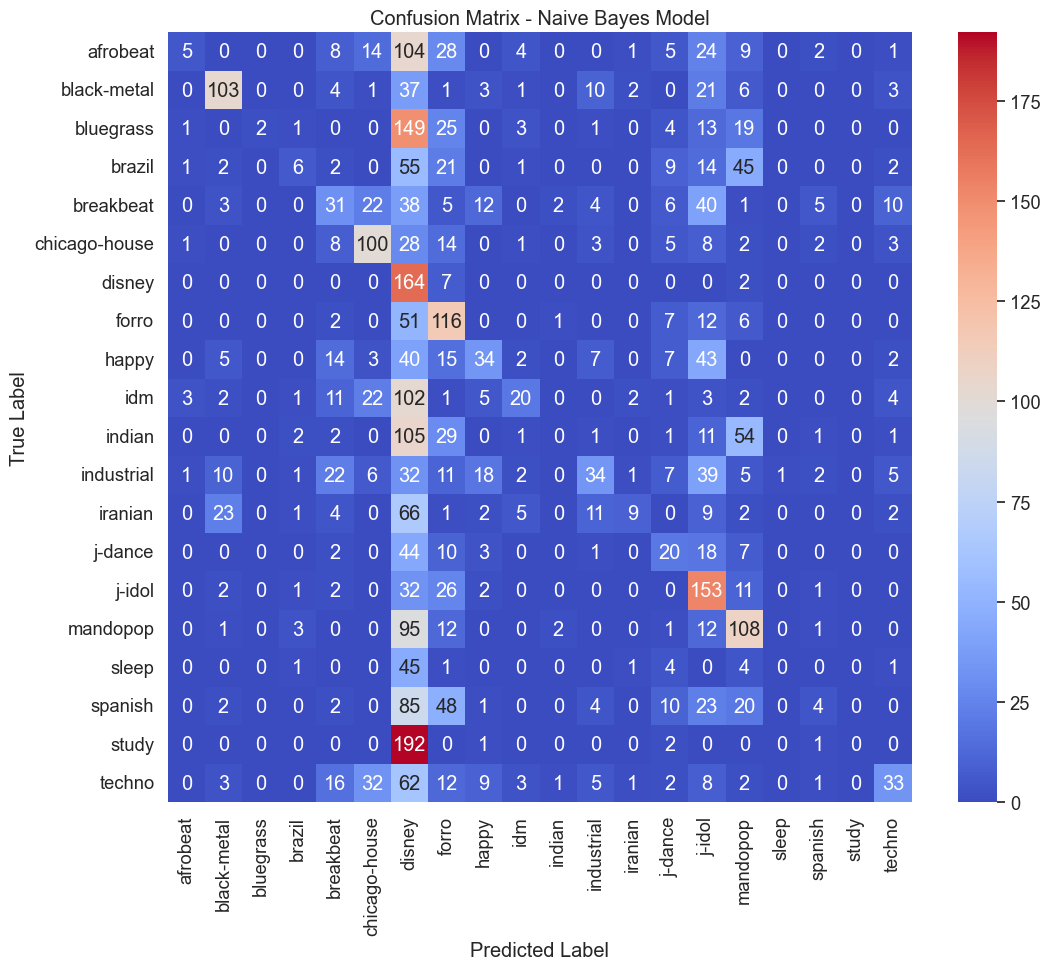

In [46]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))

# Create a Seaborn heatmap for the confusion matrix with the 'coolwarm' color map
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes Model')

# Display the plot
plt.show()

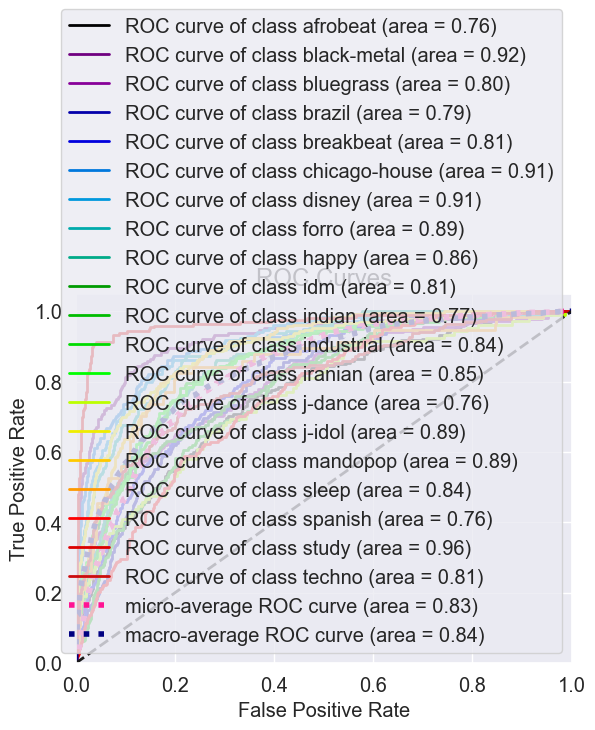

0.841678559880193


In [47]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

## Preapare train and test datasets for genre grouppings 

In [48]:
# Load train and test datasets
train_data = pd.read_csv('DataUnderstanding.csv')
test_data = pd.read_csv('cleanedTest.csv')

#non important features, update, to observe if results will imporve 
drop_columns = ['name','artists','album_name','genre']

In [49]:
# Create stratified test set
#X_train, X_strat_test, y_train, y_strat_test = train_test_split(
 #   X_train, 
  #  y_train, 
   # test_size=0.2, 
   # random_state=42, 
    #stratify=y_train
#)

# Print class distribution in the original dataset
#print("Original class distribution:")
#print(y_train.value_counts())

# Print class distribution in the stratified test set
#print("\nClass distribution in the stratified test set:")
#print(y_strat_test.value_counts())

## Group The Genres into 8

In [50]:

# List of genres to keep
genres_to_keep = ['black-metal', 'iranian', 'sleep', 'study','iranian', 'forro', 'j-idol'] 
#80%Remove-sleep-iranaian-j-idol


#top9DecisionTree
#genres_to_keep = ['study', 'others', 'j-idol', 'disney', 'forro', 'chicago-house', 'mandopop', 'techno', 'black-metal']


## based on precision performance of KNN results
## 90% --- ['black-metal', 'iranian', 'sleep', 'study']

#genres_to_keep = ['black-metal', 'forro', 'j-idol', 'study']

#genres_to_keep = ['black-metal', 'forro', 'j-idol', 'study'] --  for  Normal method top genres
#Study: 0.70
#Black-Metal: 0.61
#J-Idol: 0.52
#Forro: 0.52
#Disney: 0.49

# Function to update genre names
def update_genre(row):
    return row['genre'] if row['genre'] in genres_to_keep else 'others'

# Apply the function to create a new column 'updated_genre'
train_data['genre'] = train_data.apply(update_genre, axis=1)



# Apply the function to create a new column 'updated_genre'
test_data['genre'] = test_data.apply(update_genre, axis=1)

In [51]:
label_freq = train_data['genre'].value_counts()

# Print or display the frequency of each label
print(label_freq)

others         7885
j-idol          683
study           607
forro           606
black-metal     553
iranian         388
sleep           151
Name: genre, dtype: int64


In [52]:
#pip install imbalanced-learn

In [53]:
#pip install --upgrade scikit-learn

In [54]:
#pip install --upgrade imbalanced-learn

In [55]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [56]:
X_train, y_train = train_data.drop(drop_columns, axis=1), train_data['genre']
X_test, y_test = test_data.drop(drop_columns, axis=1), test_data['genre']

In [93]:
# Define the desired number of samples for each class
desired_samples = 1500

# Oversample the 'sleep' class
oversampler = RandomOverSampler(sampling_strategy={'sleep': desired_samples,'iranian': desired_samples, 'black-metal': desired_samples, 'study': desired_samples,
                                                  'j-idol': desired_samples, 'forro': desired_samples,})
X_over, y_over = oversampler.fit_resample(X_train, y_train)

# Undersample other classes
undersampler = RandomUnderSampler(sampling_strategy={'others': desired_samples
                                                      })
X_resampled, y_resampled = undersampler.fit_resample(X_over, y_over)

# Check the class distribution after resampling
print(Counter(y_resampled))


Counter({'black-metal': 1500, 'forro': 1500, 'iranian': 1500, 'j-idol': 1500, 'others': 1500, 'sleep': 1500, 'study': 1500})


In [94]:
# Define the desired number of samples for each class
#desired_samples = 4000

# Oversample the 'sleep' class
#oversampler = RandomOverSampler(sampling_strategy={'sleep': desired_samples,'iranian': desired_samples, 'black-metal': desired_samples, 'study': desired_samples, })
#X_over, y_over = oversampler.fit_resample(X_train, y_train)

# Undersample other classes
#undersampler = RandomUnderSampler(sampling_strategy={'others': desired_samples
                                                      #})
#X_resampled, y_resampled = undersampler.fit_resample(X_over, y_over)

# Check the class distribution after resampling
#print(Counter(y_resampled))

In [95]:
# Assuming X is your feature matrix and y is your target variable
#X_resampled, y_resampled = RandomOverSampler(sampling_strategy='minority').fit_resample(X_train, y_train)

# Check the class distribution after resampling
#print(Counter(y_resampled))

In [96]:
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
#from collections import Counter

# Assuming X is your feature matrix and y is your target variable
#X_resampled, y_resampled = RandomOverSampler(sampling_strategy='minority').fit_resample(X_train,y_train )
#X_resampled, y_resampled = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_resampled, y_resampled)

# Check the class distribution after resampling
#print(Counter(y_resampled))

In [97]:
print(" No Sampling  - " ,X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(" With Sampling  - " ,X_resampled.shape, X_test.shape, y_resampled.shape, y_test.shape)

 No Sampling  -  (10873, 18) (2878, 18) (10873,) (2878,)
 With Sampling  -  (10500, 18) (2878, 18) (10500,) (2878,)


# Scaled - X_train

In [98]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [99]:
# Build and train the decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)

#use for stratified - y_test_pred = dt_model.predict(X_strat_test)

In [100]:
#plt.figure(figsize=(20, 4), dpi=100)
#plot_tree(dt_model, feature_names=df1.columns.tolist(), filled=True)
#plt.show()

In [101]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7307157748436414


In [102]:
#Stratified - Evaluate the model on the test set
#test_accuracy = accuracy_score(y_strat_test, y_test_pred)
#print("Test Accuracy:", test_accuracy)

In [103]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

 black-metal       0.63      0.57      0.60       153
       forro       0.42      0.56      0.48       156
     iranian       0.50      0.43      0.46       108
      j-idol       0.35      0.53      0.42       184
      others       0.85      0.80      0.83      2074
       sleep       0.25      0.28      0.26        46
       study       0.70      0.69      0.69       157

    accuracy                           0.73      2878
   macro avg       0.53      0.55      0.53      2878
weighted avg       0.75      0.73      0.74      2878



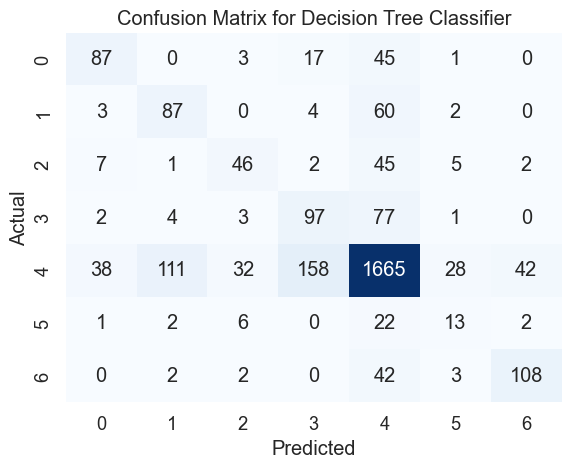

Accuracy: 0.7307157748436414


In [104]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy}')

In [105]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9204761904761903
Improved Accuracy: 0.6236970118137596


## KNN

In [106]:
#Scale dataset 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [107]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=24, metric='manhattan')  # You can adjust the number of neighbors (k)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ValueError: invalid literal for int() with base 10: 'black-metal'

In [ ]:
# Assuming you have your data loaded in X_train, X_test, y_train, y_test

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 26)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize the KNN Classifier
knn_clf = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Score:", grid_search_knn.best_score_)

# Evaluate on the test set
best_knn_clf = grid_search_knn.best_estimator_
y_pred_knn = best_knn_clf.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred_knn))

### Naive Bayes

### Gaussian

In [ ]:
clf = GaussianNB()

In [ ]:
%%time
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
clf.predict_proba(X_test)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

#### Ends Here, Shushh

### Using Sampled Data

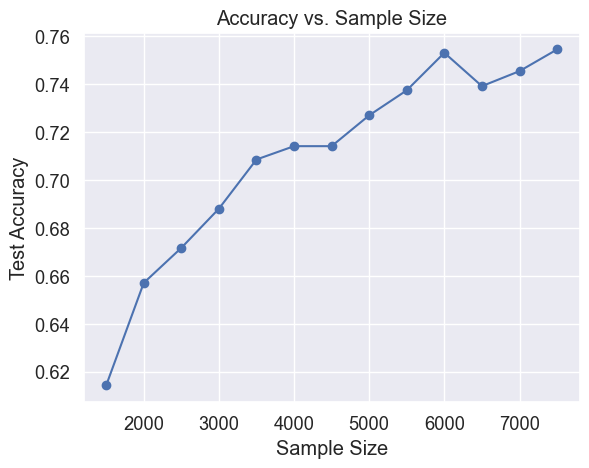

In [118]:
# Define the range of sample sizes to try
sample_sizes = np.arange(1500, 7885, 500)

# Lists to store results
accuracies = []

# Iterate over different sample sizes
for desired_samples in sample_sizes:
    # Oversample and undersample
    oversampler = RandomOverSampler(sampling_strategy={'sleep': desired_samples, 'iranian': desired_samples, 'black-metal': desired_samples, 'study': desired_samples,
                                                       'j-idol': desired_samples, 'forro': desired_samples})
    X_over, y_over = oversampler.fit_resample(X_train, y_train)

    undersampler = RandomUnderSampler(sampling_strategy={'others': desired_samples})
    X_resampled, y_resampled = undersampler.fit_resample(X_over, y_over)

    # Build and train the decision tree model
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_resampled, y_resampled)

    # Make predictions on the test set
    y_test_pred = dt_model.predict(X_test)

    # Evaluate the model on the test set and store accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracies.append(test_accuracy)

# Plotting
plt.plot(sample_sizes, accuracies, marker='o')
plt.title('Accuracy vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
# Build and train the decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)

#use for stratified - y_test_pred = dt_model.predict(X_strat_test)

In [ ]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

In [ ]:
print(classification_report(y_test, y_test_pred))

In [82]:
#Scale dataset 

scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.fit_transform(X_test)

In [83]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=24, metric='manhattan')  # You can adjust the number of neighbors (k)

# Fit the model to the training data
knn_classifier.fit(X_resampled_scaled, y_resampled)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4138410227904391

Classification Report:
              precision    recall  f1-score   support

 black-metal       0.32      0.74      0.45       192
       forro       0.28      0.83      0.42       195
     iranian       0.25      0.50      0.33       135
      j-idol       0.20      0.80      0.33       230
      others       0.95      0.28      0.43      2593
       sleep       0.11      0.60      0.19        57
       study       0.49      0.89      0.63       196

    accuracy                           0.41      3598
   macro avg       0.37      0.66      0.40      3598
weighted avg       0.77      0.41      0.43      3598



In [84]:
%%time
clf.fit(X_resampled, y_resampled)

CPU times: total: 0 ns
Wall time: 17 ms


GaussianNB()

In [85]:
y_pred = clf.predict(X_test)

C:\Users\PC2\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 black-metal       0.00      0.00      0.00       192
       forro       0.00      0.00      0.00       195
     iranian       0.05      0.76      0.09       135
      j-idol       0.00      0.00      0.00       230
      others       0.00      0.00      0.00      2593
       sleep       0.02      0.51      0.04        57
       study       0.00      0.00      0.00       196

    accuracy                           0.04      3598
   macro avg       0.01      0.18      0.02      3598
weighted avg       0.00      0.04      0.00      3598



C:\Users\PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Stratified Test Set

In [87]:
#Create stratified test set
X_test, X_strat_test, y_test, y_strat_test = train_test_split(
    X_test, 
    y_test, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_test
)

#Print class distribution in the original dataset
print("Original class distribution:")
print(y_test.value_counts())

#Print class distribution in the stratified test set
print("\nClass distribution in the stratified test set:")
print(y_strat_test.value_counts())

Original class distribution:
others         2074
j-idol          184
study           157
forro           156
black-metal     153
iranian         108
sleep            46
Name: genre, dtype: int64

Class distribution in the stratified test set:
others         519
j-idol          46
study           39
black-metal     39
forro           39
iranian         27
sleep           11
Name: genre, dtype: int64


In [88]:
# Desicion Tree test with stratified sampled y_test
# Make predictions on the test set
y_test_pred = dt_model.predict(X_strat_test)

C:\Users\PC2\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [89]:

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_strat_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.25555555555555554


In [90]:
print(classification_report(y_strat_test, y_test_pred))

              precision    recall  f1-score   support

 black-metal       0.22      0.13      0.16        39
       forro       0.18      0.26      0.21        39
     iranian       0.09      0.78      0.15        27
      j-idol       0.25      0.39      0.30        46
      others       0.74      0.25      0.37       519
       sleep       0.00      0.00      0.00        11
       study       0.00      0.00      0.00        39

    accuracy                           0.26       720
   macro avg       0.21      0.26      0.17       720
weighted avg       0.58      0.26      0.32       720



# KNN 

In [91]:
clf = KNeighborsClassifier(n_neighbors=19, metric="euclidean", weights="uniform")
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [92]:
clf.score(X_test, y_test)

0.7887421820708825

## END 